In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Création du dataframe

In [2]:
df = pd.DataFrame({
    'Maths':[6,8,6,14.5,14,11,5.5,13,9],
    'Sciences':[6,8,7,14.5,14,10,7,12.5,9.5],
    'Francais':[5,8,11,15.5,12,5.5,14,8.5,12.5],
    'Latin':[5.5,8,9.5,15,12,7,11.5,9.5,12],
    'Musique':[8,9,11,8,10,13,10,12,18]
})

In [3]:
df.index = ['Jean', 'Jacques', 'Aline', 'Emeline','Antoine', 'Jules','Chloé','Jeanne','Béatrice']

In [4]:
df

Maths  Sciences  Francais  Latin  Musique
Jean        6.0       6.0       5.0    5.5        8
Jacques     8.0       8.0       8.0    8.0        9
Aline       6.0       7.0      11.0    9.5       11
Emeline    14.5      14.5      15.5   15.0        8
Antoine    14.0      14.0      12.0   12.0       10
Jules      11.0      10.0       5.5    7.0       13
Chloé       5.5       7.0      14.0   11.5       10
Jeanne     13.0      12.5       8.5    9.5       12
Béatrice    9.0       9.5      12.5   12.0       18

In [5]:
mat1 = df.values
print(mat1)
mat1.T

[[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.  10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]


array([[ 6. ,  8. ,  6. , 14.5, 14. , 11. ,  5.5, 13. ,  9. ],
       [ 6. ,  8. ,  7. , 14.5, 14. , 10. ,  7. , 12.5,  9.5],
       [ 5. ,  8. , 11. , 15.5, 12. ,  5.5, 14. ,  8.5, 12.5],
       [ 5.5,  8. ,  9.5, 15. , 12. ,  7. , 11.5,  9.5, 12. ],
       [ 8. ,  9. , 11. ,  8. , 10. , 13. , 10. , 12. , 18. ]])

In [6]:
import sklearn

In [7]:
from sklearn.preprocessing import StandardScaler

Instanciation


In [8]:
sc = StandardScaler()

On centre et réduit les données

In [9]:
Z = sc.fit_transform(mat1)

In [10]:
print(Z)

[[-1.08650256 -1.28173989 -1.50366322 -1.62520902 -1.01904933]
 [-0.4938648  -0.61300603 -0.63985669 -0.72231512 -0.67936622]
 [-1.08650256 -0.94737296  0.22394984 -0.18057878  0.        ]
 [ 1.43220792  1.560379    1.51965963  1.8057878  -1.01904933]
 [ 1.28404848  1.39319553  0.51188535  0.72231512 -0.33968311]
 [ 0.39509184  0.05572782 -1.35969546 -1.08347268  0.67936622]
 [-1.234662   -0.94737296  1.08775637  0.54173634 -0.33968311]
 [ 0.9877296   0.89164514 -0.49588893 -0.18057878  0.33968311]
 [-0.19754592 -0.11145564  0.65585311  0.72231512  2.37778177]]


On vérifie que les moyennes sont bien à 0 et les écarts-types à 1

In [11]:
print(np.mean(Z,axis=0))

[ 1.81953218e-16 -2.20502629e-16  2.34380416e-16 -1.23358114e-17
  4.93432455e-17]


In [12]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1.]


In [13]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [14]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[2.86181753e+00 1.15068113e+00 9.83140738e-01 3.93712053e-03
 4.23484620e-04]


In [15]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.57236350565018, 0.23013622566086223, 0.19662814765980002, 0.000787424105088043, 8.469692406996732e-05]


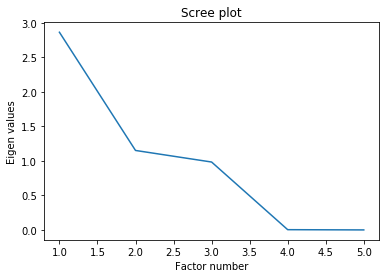

In [16]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

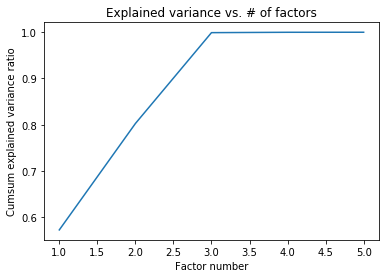

In [17]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [18]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


In [19]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.861818  2.283333
1    1.150681  1.283333
2    0.983141  0.783333
3    0.003937  0.450000
4    0.000423  0.200000


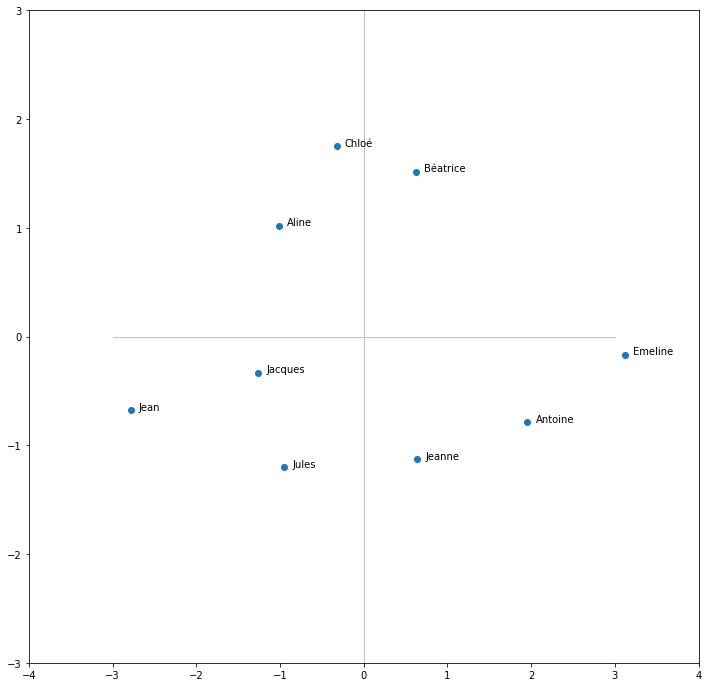

In [20]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(9):
     plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [21]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

         ID        d_i
0      Jean   8.764114
1   Jacques   2.012373
2     Aline   2.160766
3   Emeline  11.094699
4   Antoine   4.488925
5     Jules   3.643426
6     Chloé   4.013983
7    Jeanne   2.164540
8  Béatrice   6.657175


In [22]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

         id    COS2_1    COS2_2
0      Jean  0.885453  0.052212
1   Jacques  0.792041  0.054226
2     Aline  0.478429  0.481334
3   Emeline  0.878599  0.002479
4   Antoine  0.851522  0.138295
5     Jules  0.246536  0.396158
6     Chloé  0.026309  0.767096
7    Jeanne  0.187663  0.589769
8  Béatrice  0.058319  0.345793


In [23]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

         id     CTR_1     CTR_2
0      Jean  0.301293  0.044186
1   Jacques  0.061883  0.010537
2     Aline  0.040137  0.100428
3   Emeline  0.378462  0.002656
4   Antoine  0.148407  0.059945
5     Jules  0.034874  0.139374
6     Chloé  0.004100  0.297322
7    Jeanne  0.015771  0.123268
8  Béatrice  0.015073  0.222284


In [24]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.47639106  0.53024454  0.44812425  0.53807342  0.03941992]
 [-0.53263677 -0.40159625  0.56963554  0.37055187  0.305328  ]
 [ 0.15475344  0.09364365 -0.22763607 -0.10934894  0.95052978]
 [ 0.30298298 -0.51679947 -0.47749743  0.64155887 -0.03896199]
 [ 0.61123017 -0.53076393  0.44144992 -0.38679883  0.01399912]]


In [25]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [26]:
#corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 8.05906345e-01 -5.71358428e-01  1.53443384e-01  1.90111148e-02
   1.25783479e-02]
 [ 8.97009779e-01 -4.30791517e-01  9.28509134e-02 -3.24273469e-02
  -1.09224539e-02]
 [ 7.58087638e-01  6.11046939e-01 -2.25709026e-01 -2.99612823e-02
   9.08448392e-03]
 [ 9.10253819e-01  3.97490271e-01 -1.08423247e-01  4.02555596e-02
  -7.95983325e-03]
 [ 6.66863115e-02  3.27524758e-01  9.42483108e-01 -2.44472750e-03
   2.88084323e-04]]


In [27]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

         id     COR_1     COR_2
0     Maths  0.805906 -0.571358
1  Sciences  0.897010 -0.430792
2  Francais  0.758088  0.611047
3     Latin  0.910254  0.397490
4   Musique  0.066686  0.327525


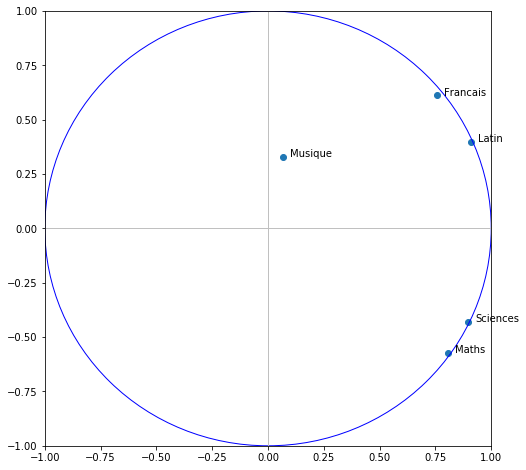

In [28]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [29]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


         id    COS2_1    COS2_2
0     Maths  0.649485  0.326450
1  Sciences  0.804627  0.185581
2  Francais  0.574697  0.373378
3     Latin  0.828562  0.157999
4   Musique  0.004447  0.107272


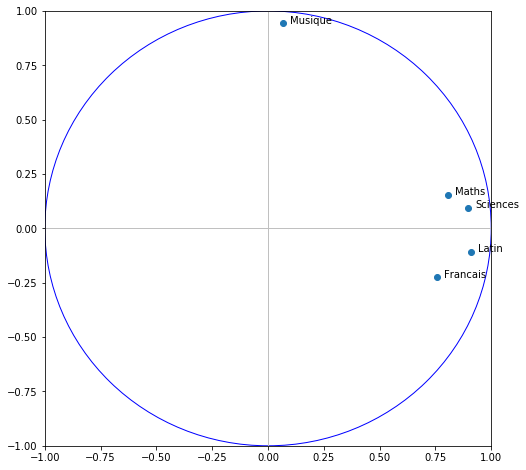

In [30]:
#cercle des corrélations pour l'axe 1 et 3
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,2])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [31]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,2]}))

         id    COS2_1    COS2_2
0     Maths  0.649485  0.023545
1  Sciences  0.804627  0.008621
2  Francais  0.574697  0.050945
3     Latin  0.828562  0.011756
4   Musique  0.004447  0.888274
